In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

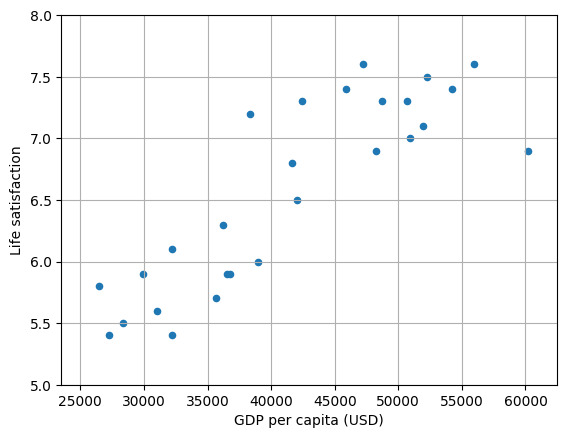

In [3]:
lifesat.plot(kind="scatter", grid=True, x="GDP per capita (USD)", y = "Life satisfaction")
plt.axis([23_500, 62_500, 5,8])
plt.show()

In [4]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X,y)
X_new = [[37_655.2]]
print(model.predict(X_new))

[[6.33333333]]


In [5]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
        housing_tarball.extractall(path="datasets")
        return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = load_housing_data()

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

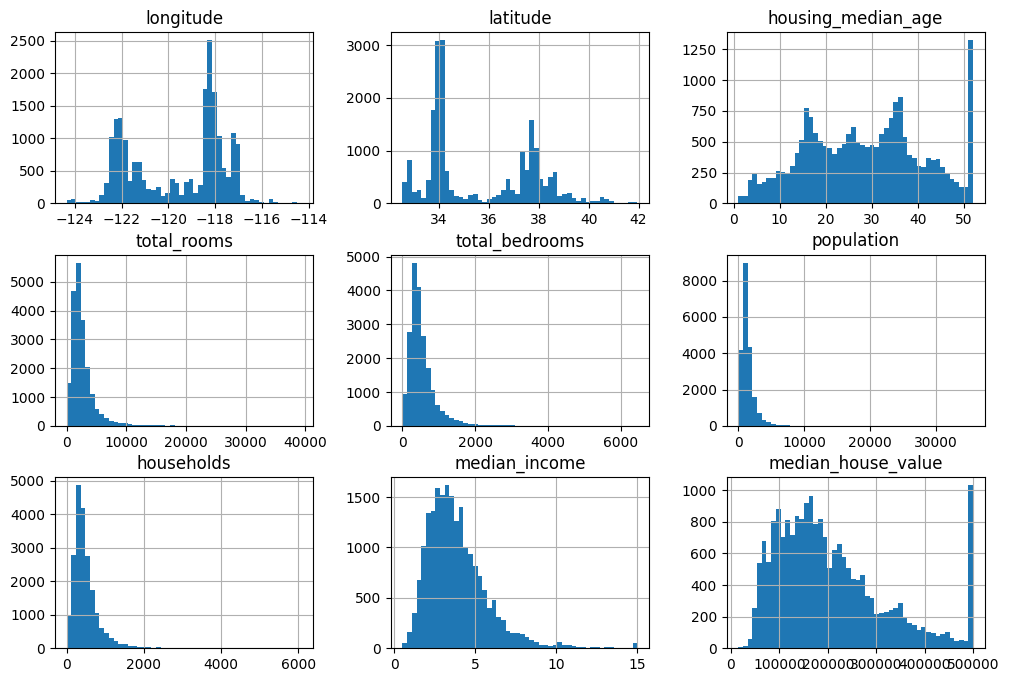

In [9]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12,8))

In [10]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

In [12]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    housing, test_size = 0.2, stratify = housing["income_cat"], random_state=42
)


In [13]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [14]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", inplace=True, axis=1)

In [15]:
housing = strat_train_set.copy()

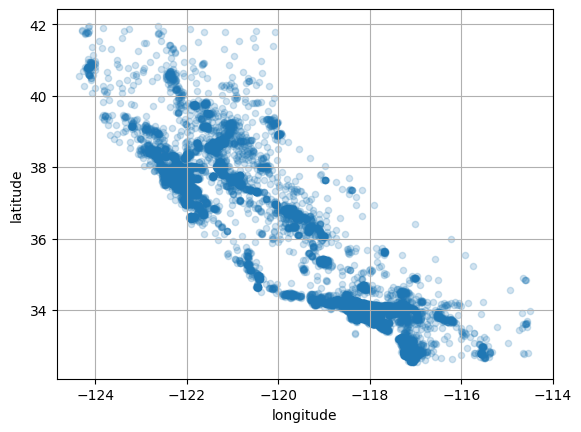

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
#aplha lets you show the density
plt.show()

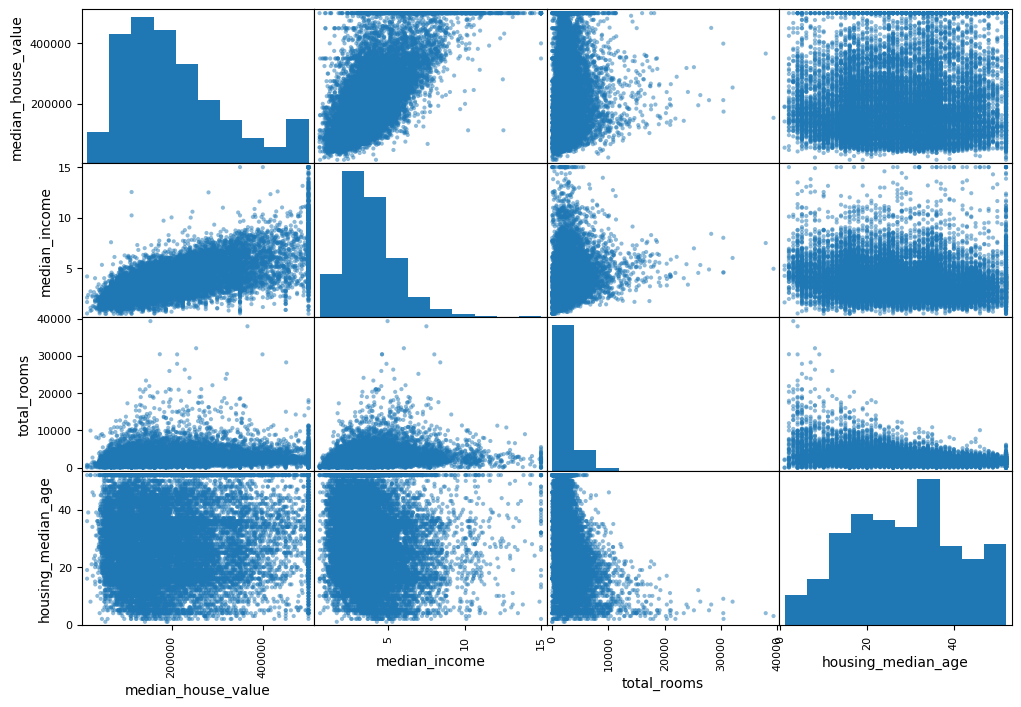

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

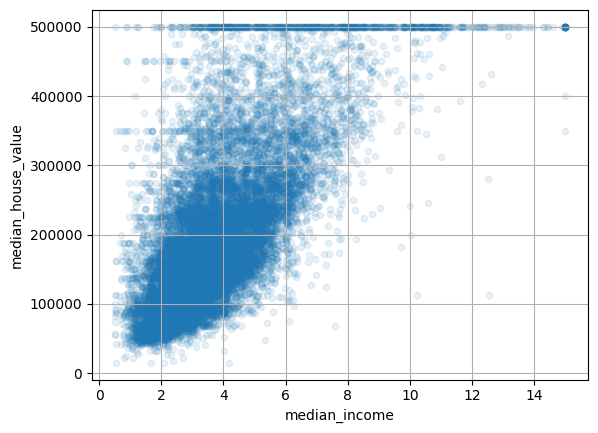

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", grid=True, alpha=0.1)
plt.show()

In [19]:
#data cleaning
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [20]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

/var/folders/dj/xwvz60ws1l19r6lsvd86jgk00000gn/T/ipykernel_13065/2694038511.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [22]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

#housing["a"] → just the content of one column
#housing[["a"]] → a new table with only one column in it

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [23]:
#convert text to number attributes
from sklearn.preprocessing import OrdinalEncoder
housing_cat_encoded = OrdinalEncoder().fit_transform(housing_cat)
housing_cat_encoded[0:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

1,2,3,4 etc will be misread by algo such as svm linear reg etc to mean something like 1 and 2 are closer or 2 is twice of 1 so instead one hot encoding turns it into a matrix such as 
 inland near_ocean near_bay
 0          0           1
 0          1           0
 1          0           0
This way model does not assume any ordinal relationship between the categories. and 0s are stored as spare matrix to save memory

In [24]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
print(cat_encoder.feature_names_in_)
print(cat_encoder.get_feature_names_out())

['ocean_proximity']
['ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND'
 'ocean_proximity_ISLAND' 'ocean_proximity_NEAR BAY'
 'ocean_proximity_NEAR OCEAN']


If the encoder encounters a new category that was not present during the fitting phase, it will raise an error by default. handle_unknown='ignore' can be used to ignore such categories.

In [25]:
df_test  = pd.DataFrame({"ocean_proximity":["INLAND","NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [26]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1))

housing_num_minmax = min_max_scaler.fit_transform(housing_num)

In [27]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing(["housing_median_age"], [[35]], gamma=0.1))

TypeError: 'DataFrame' object is not callable

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

print (scaled_labels)
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]]. iloc[:5]
scaled_predictions = model.predict(some_new_data)
print("scaled_pred",scaled_predictions)
predictions = target_scaler.inverse_transform(scaled_predictions)
print("predictions",predictions)

[[ 2.18511202]
 [ 2.40625396]
 [-0.90740625]
 ...
 [-0.49894408]
 [ 2.54675281]
 [ 0.23385961]]
scaled_pred [[-0.64466228]
 [ 0.80674175]
 [-0.52302364]
 [-0.5853166 ]
 [-0.12415952]]
predictions [[131997.15275877]
 [299359.35844434]
 [146023.37185694]
 [138840.33653057]
 [192016.61557639]]


In [ ]:
#better way to do the above
from sklearn.compose import TransformedTargetRegressor


model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [ ]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [ ]:
sf_coords = 37.7749,-122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args= dict(Y=[sf_coords]))
sf_simil = sf_transformer.transform(housing[["latitude","longitude"]])
sf_simil

array([[9.99635062e-01],
       [4.02046129e-07],
       [7.68264653e-01],
       ...,
       [8.85305152e-13],
       [3.24723754e-07],
       [9.93420734e-01]])

In [ ]:
#standard scaler clone
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.utils.validation import check_is_fitted, check_array

class StandardScalerClone(BaseEstimator, TransformerMixin): #inheriting two base class baseestimator for params and transformermixin for fit and transform
    def __init__(self, with_mean=True): #no args or kwargs
        self.with_mean = with_mean
    def fit(self, X, y=None):
        X = check_array(X) #converts X to numpy array so you can use mean and std function 
        self.mean_ = X.mean(axis = 0)
        self.scale_ = X.std(axis = 0) #standard Scikit-Learn naming convention for learned attributes (notice the underscore at the end)
        self.n_features_in_ = X.shape[1] #saves number of features; used in .transform() for input shape check
        return self #Returns self so you can chain .fit().transform() so always return self
    def transform (self, X):
        check_is_fitted(self) #Checks if the estimator is fitted by verifying the presence of fitted attributes (ending with a trailing underscore) 
        X = check_array(X)   #converts X into a NumPy array and validates input
        assert self.n_features_in_ == X.shape[1] #check if X has same number of features
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_ #calculating x-mean/standard deviation
        


In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.utils.validation import check_is_fitted, check_array

class StandardScalerClone2(TransformerMixin, BaseEstimator):
    def __init__(self, with_mean=True):
        self.with_mean_ = with_mean
    def fit(self, X, y=None):
        if self.with_mean_:
            self.mean_ = X.mean(axis = 0)
        self.scale_ = np.std(X, axis = 0)
        self.n_features_in_ = (X.shape[1])
        self.feature_names_in = X.shape[1]
        return self
    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == (X.shape[1])
        if self.with_mean_:
            X = X-self.mean_
        return X/self.scale_
    def inverse_transform(self, X):
        check_is_fitted(self)
        X = X * self.scale_
        if self.with_mean_:
           return X+ self.mean_
        return X
    def get_feature_names_out_(self, input_features=None):
        if self.n_features_in_ == input_features:
            return input_features
        if input_features is None: 
            if self.feature_names_in:
                return self.feature_names_in
            else:
                return np.array(X[:self.n_features_in_.length()])

    

In [ ]:
from sklearn.utils.estimator_checks import check_estimator
check_estimator(StandardScalerClone())

AssertionError: `StandardScalerClone.transform()` does not check for consistency between input number
of features with StandardScalerClone.fit(), via the `n_features_in_` attribute.
You might want to use `sklearn.utils.validation.validate_data` instead
of `check_array` in `StandardScalerClone.fit()` and StandardScalerClone.transform()`. This can be done
like the following:
from sklearn.utils.validation import validate_data
...
class MyEstimator(BaseEstimator):
    ...
    def fit(self, X, y):
        X, y = validate_data(self, X, y, ...)
        ...
        return self
    ...
    def transform(self, X):
        X = validate_data(self, X, ..., reset=False)
        ...
    return X


In [ ]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters = 10, gamma = 1.0, random_state = None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    
    def fit(self, X, y=None , sample_weight = None):
        self.kmeans_ = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight)
        return self
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    def get_features_name_out(self, names=None):
        return [f"Cluster (i) similarity" for i in range(self.n_clusters)]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

class KNeighboursFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
    def fit(self, X, y):
        self.knn = KNeighborsRegressor(n_neighbors=self.n_neighbours)
        self.knn.fit(X, y)
        return self
    def transform(self, X):
        return self.knn.predict(X).reshape(-1,1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

In [ ]:
#if not want to name the transformers
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

#example num_pipeline["simpleimputer"] returns the estimator named "simpleimputer".

In [ ]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = ["longitude", "latitude", "housing_median_age",
"total_rooms",
"total_bedrooms", "population", "households",
"median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)
preprocessing = ColumnTransformer([
    ("num",num_pipeline, num_attribs),
    ("cat",cat_pipeline, cat_attribs)
])


In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)


In [ ]:
# single pipeline that do all the above transformations
from sklearn.preprocessing import FunctionTransformer

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def feature_names_fn(name):
    def inner(input_features):
        return [name]
    return inner

def ratio_pipeline(name=None):
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=feature_names_fn(name)), 
        StandardScaler()
    )
log_pipeline = make_pipeline(SimpleImputer(strategy="median"),FunctionTransformer(np.log),StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())
preprocessing = ColumnTransformer([
    ("bedroom_ratio", ratio_pipeline("bedroom_ratio"), ["total_bedrooms","total_rooms"] ),
    ("rooms_per_house", ratio_pipeline("rooms_per_house"),["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline("people_per_house"),["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms","population", "households","median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline,make_column_selector(dtype_include=object)),
    ],remainder=default_num_pipeline
)

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)
# preprocessing.get_feature_names_out()
housing_prepared

array([[ 1.84662439, -0.86602737, -0.33020372, ...,  1.        ,
         0.        ,  1.86111875],
       [-0.5081207 ,  0.0245495 , -0.25361631, ...,  0.        ,
         0.        ,  0.90762971],
       [-0.20215476, -0.04119332, -0.05104091, ...,  0.        ,
         0.        ,  0.35142777],
       ...,
       [-0.24249175, -0.10998748,  0.15854151, ...,  0.        ,
         1.        , -1.23772062],
       [ 0.25977479, -0.36093745, -0.21033248, ...,  0.        ,
         0.        ,  0.66925745],
       [ 3.61270996, -1.32397227,  0.04958379, ...,  0.        ,
         1.        ,  1.22545939]])

In [ ]:
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

In [ ]:
#linear regression to get started
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels) #housing labels are train set labels of median_house_value

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedroom_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function feature_name...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x32103a400>)])),
                ('linearregression', LinearRegression())])

In [ ]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)



array([246000., 372700., 135700.,  91400., 330900.])

In [ ]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [ ]:
from sklearn.metrics import root_mean_squared_error
lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

68972.88910758459

In [ ]:
#using decision tree
from sklearn.tree import DecisionTreeRegressor 
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedroom_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_pipeli...
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16ac28880>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels,housing_predictions)
tree_rmse


0.0

In [ ]:
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66551.139927
std       1110.386369
min      64607.896046
25%      66157.004240
50%      66308.879467
75%      66826.257468
max      68532.210664
dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(lin_rmses).describe()

count       10.000000
mean     70005.608228
std       4184.181111
min      65504.765753
25%      68174.168583
50%      68745.549757
75%      70347.617459
max      81044.631296
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47052.156858
std       1014.215773
min      45495.976649
25%      46569.493712
50%      47117.033226
75%      47480.519175
max      49155.369239
dtype: float64

In [ ]:
#using gridcv to finetune the hyperparameters
from sklearn.model_selection import GridSearchCV
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5,8,10], #double underscore acts as preprocessing.geo.n_clusters
     'random_forest__max_features': [4,6,8]
     },
    {'preprocessing__geo__n_clusters': [10,15],
     'random_forest__max_features': [6,8,10]
     },
] 
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring = "neg_root_mean_squared_error")
#total iterations ( 3*3 + 2*3 ) * 3 = 45
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedroom_ratio',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_o...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x16ac28880>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedroom_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_pipeline.<...
                                                                    n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x17f29b580>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

- The best estimator is available using grid_search.best_estimator_.
- best estimator mean :-
 - 1. Best preprocessing settings
    Based on what worked best during cross-validation
    For example:
        'preprocessing__geo__n_clusters': 10
 - 2. Best model hyperparameters
    Like:
    'random_forest__max_features': 6
 - 3. A model that is already trained

Refit = True means Once you're done finding the best hyperparameters using cross-validation, retrain the final model on the full training set using the best combination.


In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,5.121224,0.138357,0.187006,0.051375,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-42735.191274,-43709.972137,-44395.324819,-43613.496076,681.171329,1
13,6.677841,0.081002,0.147871,0.000733,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43549.588135,-43812.534498,-44918.587185,-44093.569939,593.169615,2
7,4.844194,0.032588,0.147171,0.000708,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43759.213378,-44158.585837,-44921.906978,-44279.902065,482.356937,3
9,4.835968,0.015184,0.143447,0.002033,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43759.213378,-44158.585837,-44921.906978,-44279.902065,482.356937,3
6,3.410891,0.012889,0.145379,0.002837,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-43888.348085,-44072.242306,-44919.518652,-44293.369681,449.073989,5


RandomizedSearchCV is more commonly used as it only selectes a random subset from a distribution based on n_iter and is faster than less expensive than grid search that tries all combinations of hyperparameters.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),'random_forest__max_features': randint(low=2, high=20)}
rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3, scoring="neg_root_mean_squared_error",random_state=42)
rnd_search.fit(housing,housing_labels)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedroom_ratio',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_n...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x16ac28880>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17fd56220>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17fd54100>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
rnd_search.best_params_

{'preprocessing__geo__n_clusters': 45, 'random_forest__max_features': 9}

In [ ]:
#IMPORTANCE OF FEATURES RANKED
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()), reverse=True)

TypeError: <lambda>() takes 1 positional argument but 2 were given

In [ ]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
final_predictions = final_model.predict(X_test)
final_rmse = root_mean_squared_error(y_test, final_predictions)
final_rmse

41448.084299370465

In [ ]:
#To save the model you can use joblib
import joblib
joblib.dump(final_model, "california_housing_market.pkl")

PicklingError: Can't pickle <function column_ratio at 0x16abd4550>: it's not the same object as __main__.column_ratio

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

support_reg = make_pipeline(preprocessing, SVR(kernel='linear', C=1.0))
support_rmses = -cross_val_score(support_reg, housing[:5000], housing_labels[:5000], scoring='neg_root_mean_squared_error', cv=3)
support_rmses

array([118501.5442824 , 120584.71075293, 114516.31379689])

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
support_reg = make_pipeline(preprocessing, SVR(kernel="rbf", C=1.0, gamma= 0.1))
support_rmses = -cross_val_score(support_reg, housing[:5000], housing_labels[:5000], scoring="neg_root_mean_squared_error", cv=3)

In [ ]:
print(support_reg)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedroom_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function feature_name...
                                                   'households',
                                                   'median_income']),
              

In [ ]:
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV
param_distribs_svm = {'columntransformer__geo__n_clusters': randint(low=2, high=20),'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 0.5],
    'svr__gamma': [0.01, 0.1, 1, 'scale', 'auto']}
rnd_search = RandomizedSearchCV(support_reg, param_distributions=param_distribs_svm, n_iter= 10, cv=3, scoring="neg_root_mean_squared_error",     random_state=42
)
rnd_search.fit(housing[:5000], housing_labels[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedroom_ratio',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(featu...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x1747d0d60>)])),
                                             ('svr', SVR(gamma=0.1))]),
                   param_distributions={'columntransformer__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17fd624f0>,
                                        'svr__C': [0.1, 1, 10, 100],
                                        'svr__epsilon': [0.01, 0.1, 0.5],
                                        'svr__gamma': [0.01, 0.1, 1, 'scale',
                                                       'auto']},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
rnd_search.best_params_

{'columntransformer__geo__n_clusters': 3,
 'svr__C': 100,
 'svr__epsilon': 0.1,
 'svr__gamma': 0.1}

In [ ]:
final_svm_model = rnd_search.best_estimator_
support_rmses = -cross_val_score(final_svm_model, housing[:5000], housing_labels[:5000], scoring="neg_root_mean_squared_error", cv=3)
support_rmses

array([112329.00351268, 114476.16536024, 108084.08787602])

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

support_reg = make_pipeline(preprocessing, SelectFromModel(RandomForestRegressor(random_state=42), threshold=0.005), SVR(kernel='linear', C=1.0))

In [ ]:
selector_rmses = -cross_val_score(support_reg,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

count         3.000000
mean     117927.765350
std        3108.389589
min      114547.692089
25%      116559.914747
50%      118572.137405
75%      119617.801980
max      120663.466555
dtype: float64

In [30]:
#custom transformer knearest 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import MetaEstimatorMixin, clone, BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array


class FeatureFromRegressor (MetaEstimatorMixin, TransformerMixin, BaseEstimator):
    def __init__(self, estimator):
        self.estimator = estimator
    def fit(self, X, y=None):
        check_array(X)
        self.estimator_ = clone(self.estimator)
        self.estimator_.fit(X,y)
        self.n_features_in_ = self.estimator_.n_features_in_
        if hasattr(self.estimator_, "features_names_in_"):
            self.n_features_in_ = self.estimator_.features_names_in_
        return self
    def transform(self, X):
        check_is_fitted(self)
        predictions = self.estimator_.predict(X)
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1,1)
        return predictions
    def get_features_names_out(self, names=None):
        check_is_fitted(self)
        n_outputs = getattr(self.estimator_, "n_outputs_", 1)
        estimator_class_name = self.estimator_.__class__.__name__
        estimator_short_name = estimator_class_name.lower().replace("_", "")
        return [f"{estimator_short_name}_prediction_{i}" for i in range(n_outputs)]


fit_transform() inherited from TransformerMixin
it calls self.fit(X, y) and then self.transform(X) in one go.